In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия  


In [2]:
n = 100
X = 2 * np.random.randn(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)
X_b = np.c_[np.ones((n, 1)), X] # член смещения

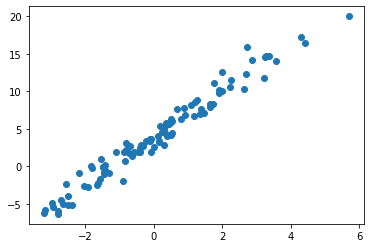

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression # готовая реализация линейной регрессии (дальше своя реализация)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.83991239]), array([[3.10324637]]))

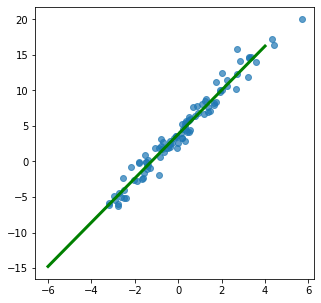

In [6]:
X_new = np.linspace(-6, 4, n).reshape(n, 1)
X_new_ones = np.c_[np.ones((100, 1)), X_new]
y_new_pred = lin_reg.predict(X_new)
plt.figure(figsize=(5, 5))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_new_pred, 'g', linewidth=3)


# Градиентный Спуск  
Итеративный способ подгонки весов

In [7]:
epochs = 1000 # количество эпох обучения
theta = np.random.randn(2, 1) # Изначально параметры модели - рандомные значения
eta = 0.01 # шаг обучения
for epoch in range(epochs):
    glob_error = 0
    grad = np.ones((2, 1))
    for i in range(n): # можно реализовать векторно, без цикла(данная реализация - просто пример)
        y_pred  = X_b[i].dot(theta) # предсказанное значение - есть взвешенная сумма
        e = (y_pred - y[i]) ** 2 / 2 # ошибка: расстояние от точки до прямой.
        glob_error += e # сумма ошибок по всем элементам множества
        grad += (y_pred - y[i]) * X_b[i].reshape(-1, 1) # считаем градиент по параметрам theta, относительно каждого элемента
    theta -= eta * grad / n # делаем непосредственно изменение параметров
    print(glob_error / 100) # отображаем среднюю ошибку
print(theta) # оптимальные параметры

[18.50677871]
[17.79832985]
[17.12838961]
[16.49449983]
[15.89436849]
[15.32585828]
[14.78697594]
[14.27586242]
[13.7907836]
[13.33012173]
[12.89236746]
[12.47611238]
[12.08004212]
[11.70292988]
[11.34363045]
[11.00107462]
[10.67426399]
[10.36226612]
[10.06421001]
[9.77928193]
[9.50672151]
[9.24581809]
[8.99590734]
[8.75636813]
[8.52661954]
[8.30611821]
[8.09435569]
[7.89085617]
[7.69517423]
[7.50689276]
[7.32562111]
[7.15099325]
[6.98266613]
[6.82031815]
[6.66364772]
[6.51237189]
[6.36622512]
[6.22495813]
[6.0883368]
[5.95614118]
[5.82816451]
[5.70421239]
[5.58410194]
[5.46766106]
[5.35472768]
[5.24514915]
[5.1387816]
[5.03548935]
[4.93514443]
[4.83762603]
[4.74282005]
[4.65061869]
[4.56092001]
[4.47362758]
[4.38865015]
[4.30590124]
[4.22529896]
[4.1467656]
[4.07022745]
[3.99561453]
[3.92286035]
[3.85190169]
[3.78267842]
[3.71513329]
[3.64921179]
[3.58486193]
[3.52203415]
[3.46068114]
[3.40075769]
[3.34222063]
[3.28502864]
[3.22914221]
[3.17452347]
[3.12113616]
[3.06894549]
[3.0179180

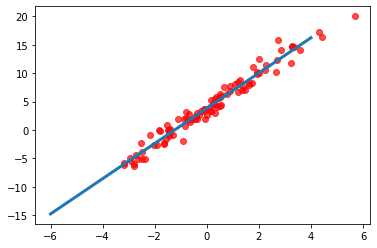

In [8]:
y_pred_gd = X_new_ones.dot(theta) 
plt.scatter(X, y, color='r', alpha=0.7)
plt.plot(X_new, y_pred_gd, linewidth=3)

# Стохастический градиентный спуск  
Отличается тем, что для вычислений берутся рандомные элементы множества

In [9]:
epochs = 1000
theta = np.random.randn(2, 1)
eta = 0.01
for epoch in range(epochs):
    glob_error = 0
    for _ in range(n):
        rnd_idx = np.random.randint(0, n) # рандомный индекс для вычисления градиента
        y_pred  = X_b[rnd_idx].dot(theta)
        e = (y_pred - y[rnd_idx]) ** 2 / 2
        glob_error += e
        grad = (y_pred - y[rnd_idx]) * X_b[rnd_idx].reshape(-1, 1)
        theta -= eta * grad # шаг по изменению параметров делается сразу
    print(glob_error / 100)
print(theta)

[6.13459205]
[1.1205837]
[0.62344974]
[0.51527114]
[0.61656995]
[0.39248102]
[0.62975909]
[0.76961811]
[0.59252047]
[0.43412092]
[0.54278218]
[0.60891976]
[0.46026769]
[0.5774097]
[0.63191728]
[0.57074578]
[0.7004115]
[0.4081946]
[0.61194407]
[0.64186285]
[0.52638204]
[0.66951541]
[0.73573571]
[0.52598818]
[0.58382444]
[0.41758831]
[0.54770512]
[0.47786281]
[0.57474484]
[0.45465667]
[0.47657582]
[0.66112871]
[0.55480163]
[0.57399135]
[0.53285985]
[0.66896772]
[0.62151425]
[0.70381593]
[0.49111045]
[0.57694604]
[0.67134948]
[0.5378947]
[0.76288326]
[0.61116378]
[0.63272092]
[0.64424942]
[0.65349396]
[0.65710274]
[0.53132984]
[0.49906093]
[0.57215472]
[0.66978378]
[0.53249423]
[0.67123974]
[0.49927397]
[0.69723475]
[0.50967432]
[0.63523014]
[0.75338781]
[0.55114389]
[0.51189092]
[0.59136614]
[0.51148707]
[0.59810824]
[0.49894132]
[0.60768472]
[0.65313198]
[0.56213973]
[0.51893045]
[0.6481314]
[0.6122452]
[0.57629488]
[0.69224907]
[0.65517033]
[0.73274533]
[0.48384769]
[0.75847047]
[0.655

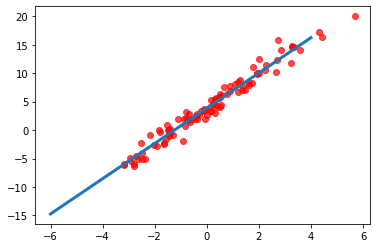

In [10]:
y_pred_gd = X_new_ones.dot(theta)
plt.scatter(X, y, color='r', alpha=0.7)
plt.plot(X_new, y_pred_gd, linewidth=3)

# Полиноминальная регрессия

In [11]:
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1) # Квадратичная функция

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разделяем обуч. множество

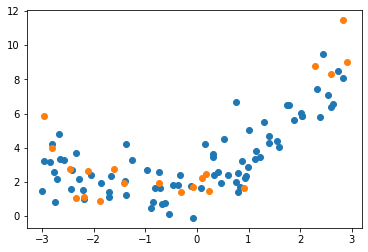

In [14]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [15]:
from sklearn.preprocessing import PolynomialFeatures # добавление степеней x, для корректного предсказания модели

In [16]:
poly_features = PolynomialFeatures().fit(X_train)
X_poly = poly_features.transform(X_train)
X_poly[:5]

array([[ 1.        , -0.84866282,  0.72022858],
       [ 1.        , -0.33381048,  0.11142943],
       [ 1.        , -1.84871855,  3.41776027],
       [ 1.        , -1.38536465,  1.9192352 ],
       [ 1.        ,  2.3344108 ,  5.44947376]])

In [17]:
# Оптимизация методом Градиентного спуска
epochs = 1000
theta = np.random.rand(3, 1)
m = X_train.shape[0]
for epoch in range(epochs):
    glob_error = 0
    grad = np.ones((3, 1))
    for i in range(m):
        y_pred = X_poly[i].dot(theta)
        e = (y_pred - y_train[i]) ** 2 / 2
        glob_error += e
        grad += (y_pred - y_train[i]) * X_poly[i:i + 1].T
    theta -= eta * grad / m
    print("MSE: {}".format(glob_error / m))
print(theta)

MSE: [5.45216375]
MSE: [4.26915627]
MSE: [3.45038718]
MSE: [2.88185316]
MSE: [2.48530942]
MSE: [2.20704899]
MSE: [2.01020345]
MSE: [1.8694597]
MSE: [1.76743468]
MSE: [1.69218773]
MSE: [1.63551356]
MSE: [1.59177078]
MSE: [1.55707812]
MSE: [1.52876269]
MSE: [1.50498145]
MSE: [1.48446134]
MSE: [1.46632095]
MSE: [1.44994812]
MSE: [1.43491589]
MSE: [1.42092481]
MSE: [1.4077633]
MSE: [1.39528045]
MSE: [1.38336731]
MSE: [1.37194405]
MSE: [1.36095109]
MSE: [1.35034306]
MSE: [1.34008453]
MSE: [1.3301472]
MSE: [1.32050784]
MSE: [1.31114694]
MSE: [1.30204771]
MSE: [1.29319543]
MSE: [1.28457697]
MSE: [1.27618046]
MSE: [1.26799506]
MSE: [1.26001074]
MSE: [1.25221821]
MSE: [1.2446088]
MSE: [1.23717437]
MSE: [1.22990728]
MSE: [1.22280035]
MSE: [1.21584679]
MSE: [1.20904019]
MSE: [1.2023745]
MSE: [1.19584398]
MSE: [1.1894432]
MSE: [1.18316702]
MSE: [1.17701058]
MSE: [1.17096925]
MSE: [1.16503866]
MSE: [1.15921465]
MSE: [1.15349328]
MSE: [1.14787082]
MSE: [1.14234371]
MSE: [1.13690858]
MSE: [1.13156222

# Гребневая регрессия  
J(θ) = Error(θ) + alpha / 2 * ∑θ^2

In [18]:
np.random.seed(42)
n = 100
X = 3 * np.random.rand(n, 1)
X_b = np.c_[np.ones((n, 1)), X]
y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(n, 1)
X_new_b = np.c_[np.ones((n, 1)), X_new]

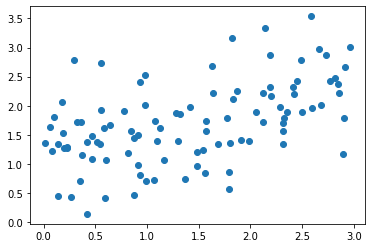

In [19]:
plt.scatter(X, y)

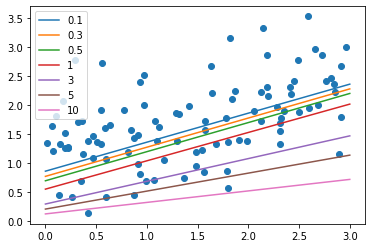

In [20]:
alphas = [0.1, 0.3, 0.5, 1, 3, 5, 10] # Коэфиценты регуляризации
for alpha in alphas:
    epochs = 1000
    eta = 0.001
    np.random.seed(42)
    theta = np.random.randn(2, 1)
    for epoch in range(epochs): # Оптимизация градиентным спуском
        glob_error = 0
        grad = 0
        for i in range(n):
            y_pred = X_b[i].dot(theta)
            e = (y_pred - y[i]) ** 2 / 2 + alpha * np.sum(theta ** 2) / 2 # к ошибке добавляется член регуляризации: коэф * сумму кадратов весов
            glob_error += e
            grad += (y_pred - y[i]) * X_b[i].reshape((-1, 1)) + alpha * theta 
        theta -= eta * grad / n
    plt.plot(X_new, X_new_b.dot(theta), label=f"{alpha}")
plt.scatter(X, y)
plt.legend()
plt.show()

# Лассо регрессия  
J(θ) = Error(θ) + alpha * ∑|θ|

[[0.76408387]
 [0.55571619]]
[[0.70916397]
 [0.54926029]]
[[0.58959006]
 [0.53314086]]
[[0.47278735]
 [0.51505711]]
[[0.18860959]
 [0.46418342]]


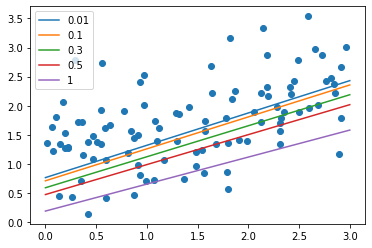

In [21]:
alphas = [0.01, 0.1, 0.3, 0.5, 1]
for alpha in alphas:
    np.random.seed(42)
    epochs = 1000
    eta = 0.001
    theta = -0.5 + np.random.randn(2, 1)
    for epoch in range(epochs):
        glob_error = 0
        grad = 0
        for i in range(n):
            y_pred = X_b[i].dot(theta)
            e = (y_pred - y[i]) ** 2 / 2 + alpha * np.sum(np.abs(theta))
            glob_error += e
            grad += (y_pred - y[i]) * X_b[i].reshape((-1, 1)) + alpha * np.sign(theta)
        theta -= eta * grad / n
    print(theta)
    plt.plot(X_new, X_new_b.dot(theta), label=f"{alpha}")
plt.scatter(X, y)
plt.legend()
plt.show()

# Раннее прекращение

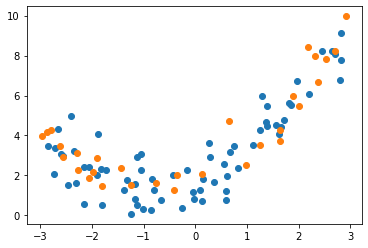

In [23]:
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(n, 1)
poly_feat = PolynomialFeatures().fit(X)
X_new = poly_feat.transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.3, random_state=42) # разбиение генеральной совокупности на train и val
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_val[:, 1], y_val)

In [28]:
epochs = 10000
eta = 0.1
m_t = X_train.shape[0] 
m_v = X_val.shape[0]
min_val_error = float('inf') # Флаг для условия
best_epoch = 0 # Сохраним эпоху с минимальной валидационной ошибкой
theta = np.random.randn(3, 1) # рандомные веса
best_weights = np.zeros((3, 1)) # сохраним лучшие веса, дающие минимальную ошибку на валидационном мн-ве
for epoch in range(epochs): # градиентный спуск
    y_pred_train = X_train.dot(theta) # предсказание на train
    mse_train = np.sum((y_pred_train - y_train) ** 2) / 2 / m_t # mean squared error на обучающем мн-ве
    y_pred_val = X_val.dot(theta) # предсказание на валидационном мн-ве
    mse_val = np.sum((y_pred_val - y_val) ** 2) / 2 / m_v # mean squared error на валидационном мн-ве
    grad = X_train.T.dot(y_pred_train - y_train) / m_t # градиент
    theta -= eta * grad # шаг изменения весов
    #print(epoch, "\tMSE TRAIN: {} ####### MSE VAL: {}".format(mse_train, mse_val))
    if mse_val < min_val_error: # Если полученная ошибка на валидационном мн-ве меньше текущей 
        min_val_epoch = mse_val # перезапишем границу
        best_epoch = epoch # сохраним лучшую эпоху
        best_weights = theta # сохраним лучшие веса

print("BEST_EPOCH: {}".format(best_epoch))
print("MIN_VAL_EPOCH: {}".format(min_val_epoch))
print("BEST_WEIGHTS: {}".format(best_weights))

BEST_EPOCH: 9999
MIN_VAL_EPOCH: 0.28135294803202765
BEST_WEIGHTS: [[1.7591572 ]
 [0.929247  ]
 [0.54509661]]


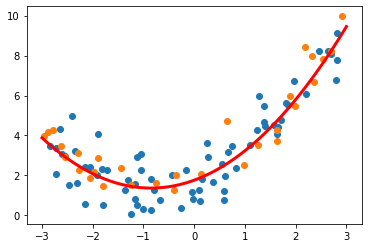

In [29]:
X_test = np.linspace(-3, 3, 100).reshape((-1, 1))
X_test_poly = poly_feat.transform(X_test)
y_test_pred = X_test_poly.dot(theta)
plt.scatter(X_train[:, [1]], y_train)
plt.scatter(X_val[:, [1]], y_val)
plt.plot(X_test_poly[:, [1]], y_test_pred, 'r', linewidth=3)

# Логистическая регрессия задача об ИРИСАХ  
Оценивает вероятность принадлежности объекта к классу  
Оценка происходит путём подсчёта взвешенной суммы входных данных, но ответ даётся не напрямую, а относительно логистического результата:  
p = σ(XᵀΘ)  
p - вероятность  
σ(.) - представляет собой сигмоидальную функцию (0, 1)

In [31]:
from sklearn import datasets

In [32]:
iris = datasets.load_iris() # Загрузим данные по ирисам
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
X = iris.data[:, 3:] # для начала загрузим только 1 признак
y = (iris.target == 2).astype(np.int8).reshape((-1, 1))
X.shape, y.shape

((150, 1), (150, 1))

In [34]:
X_b = np.c_[np.ones((150, 1)), X]

In [35]:
def logit(t): # функция сигмойда, конвертирующая взвешенную сумму в вероятность
    return 1 / (1 + np.exp(-t))

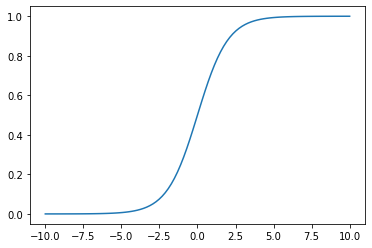

In [36]:
# Пример сигмоидальной функции
plt.plot(np.linspace(-10, 10, 100), logit(np.linspace(-10, 10, 100)))

In [37]:
epochs = 3000
eta  = 0.01
theta = np.random.randn(2, 1)
for epoch in range(epochs):
    p = logit(X_b.dot(theta)) # считаем вероятности
    y_pred = (p >= 0.5).astype(np.int8) # вырабатываем прогноз относительно вероятности
    #ERROR - logloss
    print(f"{epoch}: ACCURACY - {np.sum(y_pred == y)/ 150 * 100}% ### ERROR - {np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)) / 150}")
    grad = X_b.T.dot(p - y) / 150
    theta -= eta * grad

0: ACCURACY - 33.33333333333333% ### ERROR - 0.9696482210232447
1: ACCURACY - 33.33333333333333% ### ERROR - 0.9672845406743723
2: ACCURACY - 33.33333333333333% ### ERROR - 0.9649404434954768
3: ACCURACY - 33.33333333333333% ### ERROR - 0.9626158216905225
4: ACCURACY - 33.33333333333333% ### ERROR - 0.960310566363702
5: ACCURACY - 33.33333333333333% ### ERROR - 0.9580245675544196
6: ACCURACY - 33.33333333333333% ### ERROR - 0.9557577142723339
7: ACCURACY - 33.33333333333333% ### ERROR - 0.953509894532427
8: ACCURACY - 33.33333333333333% ### ERROR - 0.9512809953900834
9: ACCURACY - 33.33333333333333% ### ERROR - 0.9490709029761556
10: ACCURACY - 33.33333333333333% ### ERROR - 0.9468795025319949
11: ACCURACY - 33.33333333333333% ### ERROR - 0.9447066784444254
12: ACCURACY - 33.33333333333333% ### ERROR - 0.942552314280642
13: ACCURACY - 33.33333333333333% ### ERROR - 0.9404162928230098
14: ACCURACY - 33.33333333333333% ### ERROR - 0.9382984961037484
15: ACCURACY - 33.33333333333333% ### 

In [38]:
X = iris.data[:, 2:] # теперь относительно 2 признаков
y = (iris.target == 2).astype(np.int8).reshape((-1, 1))
X.shape, y.shape

((150, 2), (150, 1))

In [39]:
X_b = np.c_[np.ones((150, 1)), X]

In [40]:
epochs = 3000
eta = 0.01
theta = np.random.randn(3, 1)
for epoch in range(epochs):
    p = logit(X_b.dot(theta))
    y_pred = (p >= 0.5).astype(np.int8)
    print(f"{epoch}: ACCURACY - {np.sum(y_pred == y)/ 150 * 100}% ### ERROR - {np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)) / 150}")
    grad = X_b.T.dot(p - y)
    theta -= eta * grad

0: ACCURACY - 83.33333333333334% ### ERROR - 0.5059981539161921
1: ACCURACY - 66.66666666666666% ### ERROR - 0.6038918706241783
2: ACCURACY - 33.33333333333333% ### ERROR - 2.3506684459199025
3: ACCURACY - 66.66666666666666% ### ERROR - 2.962279193592124
4: ACCURACY - 33.33333333333333% ### ERROR - 2.473873473883168
5: ACCURACY - 66.66666666666666% ### ERROR - 2.6603525291533305
6: ACCURACY - 34.66666666666667% ### ERROR - 2.6364011616194905
7: ACCURACY - 66.66666666666666% ### ERROR - 2.331834544345442
8: ACCURACY - 34.66666666666667% ### ERROR - 2.822484648212743
9: ACCURACY - 66.66666666666666% ### ERROR - 1.9884232953481213
10: ACCURACY - 36.0% ### ERROR - 3.0146335507943363
11: ACCURACY - 66.66666666666666% ### ERROR - 1.644133003669962
12: ACCURACY - 36.0% ### ERROR - 3.1850802275418397
13: ACCURACY - 66.66666666666666% ### ERROR - 1.3223180477325371
14: ACCURACY - 40.0% ### ERROR - 3.2838949351208377
15: ACCURACY - 66.66666666666666% ### ERROR - 1.0638533550767486
16: ACCURACY -

(0.0, 7.0, 0.0, 2.7)

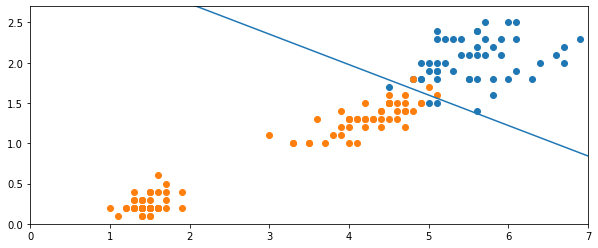

In [42]:
# Линейное разделение классов
plt.figure(figsize=(10, 4))
plt.scatter(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1])
plt.scatter(X[(y == 0).flatten(), 0], X[(y == 0).flatten(), 1])
x = np.array([1, 7])
y_plot = - (theta[1,0] * x + theta[0,0]) / theta[2,0]
plt.plot(x, y_plot)
plt.axis([0, 7, 0, 2.7])

# Многопеременная логистическая регрессия  
Когда предсказываем единственное значение, но число классов больше 2

In [44]:
X = iris.data[:, 2:]
X_b = np.c_[np.ones((150, 1)), X]
y = iris.target
X_b.shape, y.shape

((150, 3), (150,))

In [45]:
weights = np.random.randn(3, 3) # Веса для каждого класса одинаково
weights

array([[-0.93782504,  0.51503527,  0.51378595],
       [ 0.51504769,  3.85273149,  0.57089051],
       [ 1.13556564,  0.95400176,  0.65139125]])

In [46]:
def softmax(s): # функция softmax - возвращает вероятность принадлежности объекта относительно каждого класса
    return np.exp(s) / np.sum(np.exp(s), axis=1, keepdims=True)

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
one_hot = OneHotEncoder(sparse=False).fit(y.reshape((-1, 1))) # условие для softmax, чтобы таргеты были представлены бинарными последовательностями
one_hot.categories_

[array([0, 1, 2])]

In [49]:
y_one_hot = one_hot.transform(y.reshape((-1, 1)))

In [50]:
epochs = 7000
eta = 0.01
for epoch in range(epochs):
    s = X_b.dot(weights) # вычисляем взвешенную сумму
    p = softmax(s) # вычисляем вероятности каждого класса softmax
    error = np.sum(np.sum(y_one_hot * np.log(p), axis=1, keepdims=True)) / -150 # Кросс-энтропия
    print(f"{epoch}: CROSS ENTROPY - {error}")
    grad = X_b.T.dot(p - y_one_hot) / 150
    weights -= eta * grad



Выходные данные были обрезаны до нескольких последних строк (5000).
2000: CROSS ENTROPY - 0.5591481545998833
2001: CROSS ENTROPY - 0.5590371885578155
2002: CROSS ENTROPY - 0.5589263083185507
2003: CROSS ENTROPY - 0.5588155137777914
2004: CROSS ENTROPY - 0.5587048048313964
2005: CROSS ENTROPY - 0.5585941813753819
2006: CROSS ENTROPY - 0.5584836433059206
2007: CROSS ENTROPY - 0.5583731905193412
2008: CROSS ENTROPY - 0.5582628229121284
2009: CROSS ENTROPY - 0.5581525403809223
2010: CROSS ENTROPY - 0.5580423428225193
2011: CROSS ENTROPY - 0.5579322301338702
2012: CROSS ENTROPY - 0.5578222022120809
2013: CROSS ENTROPY - 0.5577122589544122
2014: CROSS ENTROPY - 0.5576024002582791
2015: CROSS ENTROPY - 0.5574926260212509
2016: CROSS ENTROPY - 0.5573829361410505
2017: CROSS ENTROPY - 0.5572733305155547
2018: CROSS ENTROPY - 0.5571638090427937
2019: CROSS ENTROPY - 0.5570543716209506
2020: CROSS ENTROPY - 0.5569450181483616
2021: CROSS ENTROPY - 0.5568357485235154
2022: CROSS ENTROPY - 0.556726